In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [27]:
lianjia_df=pd.read_csv('./Data/lianjia.csv')

## 数据加载

In [28]:
display(lianjia_df.head(n=5))

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [29]:
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [30]:
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [31]:
df=lianjia_df.copy()

# 增加每平方米价格
df['PerPrice']=lianjia_df['Price']/lianjia_df['Size']

# 重新调整列位置
columns=['Region','District','Garden','Layout','Floor','Year','Size','Elevator','Direction','Renovation','PerPrice','Price']
df=pd.DataFrame(df,columns=columns)
display(df.head(n=2))

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0


## 数据可视化分析

In [44]:
# 对二手房进行分组，对比二手房数量和每平米房价
df_house_count=df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean=df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

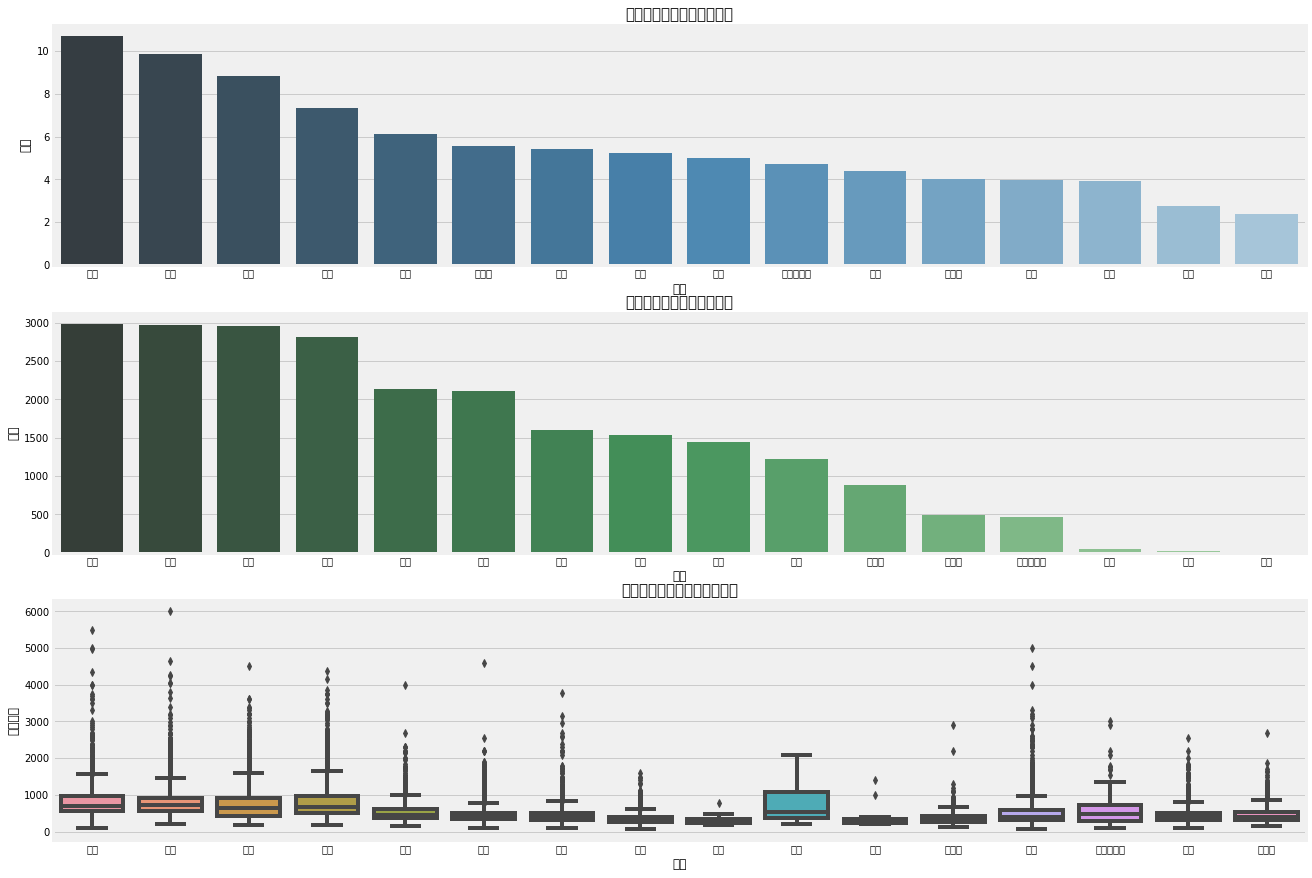

In [47]:
f, [ax1,ax2,ax3]=plt.subplots(3,1,figsize=(20,15))

sns.barplot(x='Region', y='PerPrice', palette='Blues_d', data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区每平米房价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('单价')

sns.barplot(x='Region',y='Price',palette='Greens_d',data=df_house_count,ax=ax2)
ax2.set_title('北京各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='Price', data=df,ax=ax3)
ax3.set_title('北京各大区域二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()